In [248]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [249]:
# Make the data

weight = 0.7
bias = 0.3

start = 0
step = 0.02 
end = 1

x = torch.arange(start, end, step).unsqueeze(dim=1) # Add 1 dim

y = weight * x + bias 

In [250]:
x, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [251]:
# Split the data

split_data = int(0.8 * len(x))

x_train, y_train = x[:split_data], y[:split_data]
x_test, y_test = x[split_data:], y[split_data:] 

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

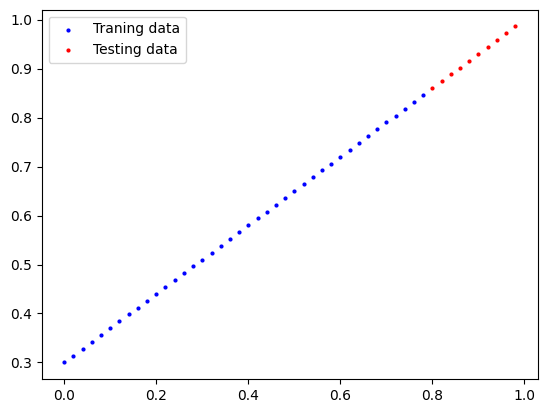

In [252]:
# Let's visualize it 

def plot_predictions(train_data=x_train,
                     test_data=y_train,
                     train_label=x_test,
                     test_label=y_test,
                     predictions=None):
    
    plt.Figure(figsize=(10, 3))

    plt.scatter(train_data, test_data, s=4, c='b', label='Traning data')

    plt.scatter(train_label, test_label, s=4, c='r', label='Testing data')

    if predictions is not None:
        plt.scatter(train_label, predictions, s=5, c='g')

    plt.legend()
    
plot_predictions()

In [253]:
# Build the model

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                                requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float),
                                        requires_grad=True)
        
    def forward(self, x):
        return self.weights * x + self.bias

In [254]:
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.7516], requires_grad=True),
 Parameter containing:
 tensor([-0.8623], requires_grad=True)]

In [255]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [256]:
with torch.inference_mode():
    y_pred = model_0(x_test)
y_pred

tensor([[-1.4636],
        [-1.4786],
        [-1.4936],
        [-1.5087],
        [-1.5237],
        [-1.5387],
        [-1.5538],
        [-1.5688],
        [-1.5838],
        [-1.5989]])

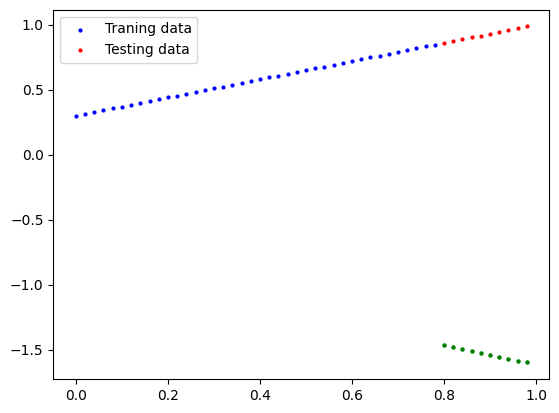

In [257]:
plot_predictions(predictions=y_pred)

In [258]:
Loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001)

In [259]:
# IT'S TRAIN TIME !!!!!!!!!!!!!!!!!!!!!!!!!!!

epochs = 10000

for epoch in range(epochs):
    model_0.train()

    y_preds = model_0(x_train)

    loss = Loss_fn(y_preds, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    print(f'Loss {loss}')
    print(list(model_0.parameters()))

    ### Testing

    model_0.eval()

Loss 1.728407621383667
[Parameter containing:
tensor([-0.7512], requires_grad=True), Parameter containing:
tensor([-0.8613], requires_grad=True)]
Loss 1.7272555828094482
[Parameter containing:
tensor([-0.7508], requires_grad=True), Parameter containing:
tensor([-0.8603], requires_grad=True)]
Loss 1.7261035442352295
[Parameter containing:
tensor([-0.7504], requires_grad=True), Parameter containing:
tensor([-0.8593], requires_grad=True)]
Loss 1.7249515056610107
[Parameter containing:
tensor([-0.7500], requires_grad=True), Parameter containing:
tensor([-0.8583], requires_grad=True)]
Loss 1.7237993478775024
[Parameter containing:
tensor([-0.7496], requires_grad=True), Parameter containing:
tensor([-0.8573], requires_grad=True)]
Loss 1.7226473093032837
[Parameter containing:
tensor([-0.7493], requires_grad=True), Parameter containing:
tensor([-0.8563], requires_grad=True)]
Loss 1.7214950323104858
[Parameter containing:
tensor([-0.7489], requires_grad=True), Parameter containing:
tensor([-0.

In [260]:
with torch.inference_mode():
    y_new_preds = model_0(x_test) 

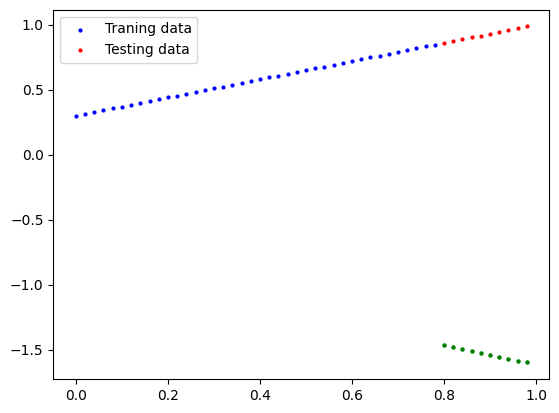

In [261]:
plot_predictions(predictions=y_pred)

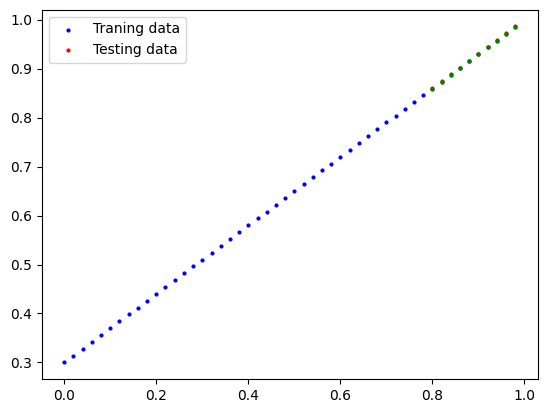

In [262]:
plot_predictions(predictions=y_new_preds)